Sales Summary:
   product  total_qty  revenue
0   Apples        112    280.0
1  Bananas         84     84.0
2  Oranges        126    226.8


<Figure size 800x500 with 0 Axes>

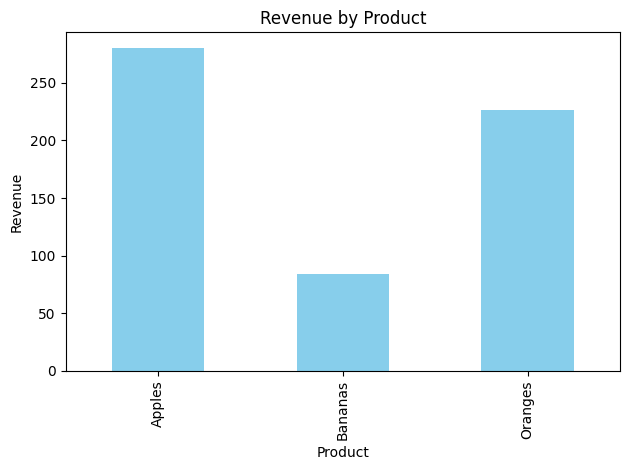

In [7]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create SQLite database and connect
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Step 2: Create sales table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

# Step 3: Insert sample data
sample_data = [
    ('Apples', 10, 2.5),
    ('Bananas', 5, 1.0),
    ('Oranges', 8, 1.8),
    ('Apples', 6, 2.5),
    ('Bananas', 7, 1.0),
    ('Oranges', 10, 1.8),
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

# Step 4: Run SQL query
query = '''
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
'''
df = pd.read_sql_query(query, conn)

# Step 5: Display the result
print("Sales Summary:")
print(df)

# Step 6: Plotting bar chart
plt.figure(figsize=(8, 5))
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")  # Optional: saves the chart
plt.show()

# Close connection
conn.close()
